In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 30)

df_ori = pd.read_csv("dataset.csv", parse_dates=True, index_col='Date')
df = df_ori
df['label'] = 0
df['tmr_dif'] = df.Gold_PM.shift(1) - df.Gold_PM 
df['ytd_dif'] = df.Gold_PM.shift(-1) - df.Gold_PM
df['WPM_dif'] = df.WPM_y.shift(-1) - df.WPM_y
df['label'] = np.where((df['tmr_dif']>0), 1, df['label'])
df['Gp_gradient'] = np.gradient(df['Gold_PM'], edge_order = 1)
df['threedays_trend'] = df.Gp_gradient.shift(1)
cols_to_order = ['Gold_PM', 'label','tmr_dif', 'ytd_dif', 'Gp_gradient'] # Reorder column
new_columns = cols_to_order + (df.columns.drop(cols_to_order).tolist())
df = df[new_columns]
df = df.dropna()
df_re = df.iloc[::-1] #reverse row (1st row = starting date)
df

,Gold_PM,label,tmr_dif,ytd_dif,Gp_gradient,WPM_x,BGC,CH_US,Crude_Oil,Gas,GFL,NC,OPEC_Oil,Palladium,Platinum,Silver,SP_500,STOXX_Europe_600,US_Bond,US_EU,US_interest_rate,US_UK,WPM_y,WPM_dif,threedays_trend
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-15,1466.90,0,-0.25,0.75,0.500,26.94,16.57,7.0075,57.83,2.70,5.35,37.61,63.12,1682.5,894.5,16.870,3120.46,406.04,108.11,1.1046,1.55,1.2901,26.94,1.06,0.250
2019-11-18,1467.65,0,-0.75,0.80,0.775,28.00,16.89,7.0246,57.14,2.64,5.46,38.06,63.44,1704.4,895.0,16.795,3122.03,405.99,108.17,1.1079,1.55,1.2965,28.00,-0.20,0.500
2019-11-19,1468.45,0,-0.80,3.25,2.025,27.80,17.05,7.0263,55.35,2.53,5.41,38.35,62.51,1737.4,912.3,17.125,3120.18,405.50,108.33,1.1075,1.55,1.2926,27.80,0.15,0.775
2019-11-20,1471.70,0,-3.25,-4.65,-0.700,27.95,16.99,7.0344,57.01,2.56,5.47,38.47,62.22,1741.8,920.0,17.115,3108.46,403.82,108.47,1.1063,1.55,1.2918,27.95,-0.47,2.025
2019-11-21,1467.05,1,4.65,-2.60,-3.625,27.48,16.64,7.0285,58.58,2.53,5.27,38.21,63.68,1731.9,917.5,17.090,3103.54,402.22,108.38,1.1067,1.55,1.2915,27.48,-0.12,-0.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,1878.65,1,0.20,-6.30,-3.250,43.46,19.39,6.7770,75.37,3.32,12.02,53.15,77.00,1777.3,1088.5,23.515,3919.25,445.71,92.18,1.0737,4.33,1.2155,43.46,-0.20,13.225
2023-11-01,1872.35,1,6.30,10.20,1.950,43.26,19.22,6.7700,77.68,3.41,12.27,52.46,78.23,1781.1,1084.3,23.870,3969.61,447.41,92.75,1.0740,4.33,1.2125,43.26,0.79,-3.250
2023-12-01,1882.55,0,-10.20,24.60,17.400,44.05,19.43,6.7365,78.65,3.47,12.32,53.40,80.73,1790.9,1084.3,23.700,3983.17,450.22,93.61,1.0823,4.33,1.2182,44.05,0.48,1.950


              precision    recall  f1-score   support

           0       0.61      0.57      0.59       401
           1       0.53      0.57      0.55       343

    accuracy                           0.57       744
   macro avg       0.57      0.57      0.57       744
weighted avg       0.57      0.57      0.57       744

[[229 172]
 [148 195]]


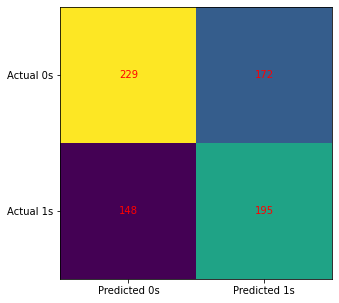

In [8]:
# Navie Bayes
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
X = df.loc[:,[ 'CH_US', 'GFL', 'Silver', 'SP_500', 'ytd_dif', 'WPM_y']]
#X = df.loc[:,['WPM_y', 'CH_US', 'Silver', 'NC', 'BGC', 'SP_500', 'ytd_dif']]
y =  df['label']
y_ar = np.array(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#model = DecisionTreeClassifier(criterion = 'entropy', class_weight = 'balanced')
model = LogisticRegression(max_iter = 2000, C = 25, class_weight = 'balanced')  
#model = RandomForestClassifier(criterion = 'entropy')
#model = GaussianNB()
#model = KNeighborsClassifier(n_neighbors=4, weights = 'uniform', algorithm = 'ball_tree')
#model = SVC(C = 10, kernel = 'linear')
train_size = 14
#tscv = TimeSeriesSplit(test_size = 1, n_splits = 750)
tscv = TimeSeriesSplit(max_train_size=train_size, test_size=1, n_splits=((len(X)) - train_size))
y_pred = []
y_true = []
p_scores_a = []
r_scores_a = []
count_true = 0
count_false = 0
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #print(y_train)
    #print(y_test)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    y_pred.append(preds)
    y_true.append(y_test)
    #p_score = precision_score(y_test, preds, zero_division = 'warn') ใช้ไม่ได้เพราะว่ามันต้องเป็น total output เว้ย
ans_p = np.array(p_scores_a)
ans_r = np.array(r_scores_a)
a = np.array(y_pred)
b = np.array(y_true)
# I cant believe it worked guys wtf
print(classification_report(b, a))
cm = confusion_matrix(b, a)
print(cm)
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [3]:
# Logistic regression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, precision_score
from sklearn.naive_bayes import GaussianNB
X = df.loc[:,[ 'CH_US', 'GFL', 'Silver', 'SP_500', 'ytd_dif']]
y =  df['label']
y_ar = np.array(y)

train_size = 14
tscv = TimeSeriesSplit(max_train_size=train_size, test_size=1, n_splits=((len(X)) - train_size))
p_scores_a = []
y_pred = []
y_true = []
count_true = 0
count_false = 0
#model = LogisticRegression(max_iter = (len(X)) - train_size)  # CAN INCREASE MAX ITERATION
#model = RandomForestRegressor(n_estimators = 10)
model = GaussianNB()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #print(y_train)
    #print(y_test)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    pred2 = model.predict_proba(X_test)
    
    print(pred2)
    #print(preds)
    #p_score = precision_score(y_test, pred2, zero_division = 1)
    p_scores_a.append(pred2)
    y_pred.append(preds)
    y_true.append(y_test)
    help1 = np.array(preds)
    help2 = np.array(y_test)
    if help1 == help2:
        count_true += 1
    else:
        count_false += 1
ans_p = np.array(p_scores_a)
#ans_p
unique_p, counts_p = np.unique(ans_p, return_counts=True)
print(dict(zip(unique_p, counts_p)))
# I cant believe it worked guys wtf
print("Precision:", (counts_p[1]/(counts_p[0] + counts_p[1])) * 100 , '%')
a = np.array(y_pred)
b = np.array(y_true)
cm = confusion_matrix(b, a)
print(cm)
print(classification_report(b, a))
print(count_true)
print(count_false)

[[0.71997352 0.28002648]]
[[0.93133951 0.06866049]]
[[0.94263075 0.05736925]]
[[9.99902352e-01 9.76481430e-05]]
[[1.00000000e+00 9.74591079e-12]]
[[0.20599452 0.79400548]]
[[0.873681 0.126319]]
[[0.07779824 0.92220176]]
[[0.02197272 0.97802728]]
[[0.02823315 0.97176685]]
[[9.99961237e-01 3.87635000e-05]]
[[1.00000000e+00 1.02099298e-25]]
[[1.00000000e+00 5.57274375e-66]]
[[1.00000000e+00 5.25960746e-86]]
[[1.00000000e+000 7.26189443e-145]]
[[1.00000000e+000 3.93779412e-191]]
[[1.00000000e+000 8.08712967e-151]]
[[9.99994095e-01 5.90496351e-06]]
[[0.87955963 0.12044037]]
[[0.16013573 0.83986427]]
[[0.42262323 0.57737677]]
[[0.00102504 0.99897496]]
[[1.06954607e-04 9.99893045e-01]]
[[4.26432471e-04 9.99573568e-01]]
[[0.5167431 0.4832569]]
[[0.65857443 0.34142557]]
[[0.19555732 0.80444268]]
[[0.77350363 0.22649637]]
[[0.98923543 0.01076457]]
[[0.98210372 0.01789628]]
[[0.08991236 0.91008764]]
[[9.99992681e-01 7.31861013e-06]]
[[0.52333345 0.47666655]]
[[0.99891812 0.00108188]]
[[1.00000000

[[0.3830886 0.6169114]]
[[0.65681996 0.34318004]]
[[0.09073059 0.90926941]]
[[7.41709472e-05 9.99925829e-01]]
[[0.05339475 0.94660525]]
[[9.99758247e-01 2.41753362e-04]]
[[0.90801627 0.09198373]]
[[0.01706428 0.98293572]]
[[3.64366331e-05 9.99963563e-01]]
[[0.78027667 0.21972333]]
[[9.99437856e-01 5.62144471e-04]]
[[9.99992883e-01 7.11671662e-06]]
[[0.52192762 0.47807238]]
[[0.85131213 0.14868787]]
[[0.26317263 0.73682737]]
[[0.10662659 0.89337341]]
[[0.38801001 0.61198999]]
[[0.45626775 0.54373225]]
[[0.99196508 0.00803492]]
[[9.99502819e-01 4.97181180e-04]]
[[9.99478200e-01 5.21800239e-04]]
[[9.99989375e-01 1.06249558e-05]]
[[1.00000000e+00 4.78457852e-24]]
[[0.9961376 0.0038624]]
[[0.84800093 0.15199907]]
[[0.53279107 0.46720893]]
[[0.64483576 0.35516424]]
[[0.17058614 0.82941386]]
[[0.11954536 0.88045464]]
[[0.40241755 0.59758245]]
[[0.89005407 0.10994593]]
[[0.96581436 0.03418564]]
[[1.00000000e+00 7.39167955e-17]]
[[1.00000000e+00 2.14686784e-33]]
[[1.00000000e+00 1.87949198e-25]

[[0.42466299 0.57533701]]
[[0.16936853 0.83063147]]
[[0.0735749 0.9264251]]
[[0.89074791 0.10925209]]
[[0.43364095 0.56635905]]
[[0.43802198 0.56197802]]
[[0.09640756 0.90359244]]
[[3.81950235e-05 9.99961805e-01]]
[[2.92444484e-17 1.00000000e+00]]
[[2.47053369e-17 1.00000000e+00]]
[[5.44966714e-29 1.00000000e+00]]
[[8.62530146e-25 1.00000000e+00]]
[[2.03686183e-25 1.00000000e+00]]
[[8.94805248e-21 1.00000000e+00]]
[[0.24745732 0.75254268]]
[[0.02530083 0.97469917]]
[[2.59157005e-04 9.99740843e-01]]
[[4.88074209e-94 1.00000000e+00]]
[[0.09622631 0.90377369]]
[[4.22824796e-06 9.99995772e-01]]
[[1.30593905e-11 1.00000000e+00]]
[[1.05358271e-22 1.00000000e+00]]
[[1.79346927e-14 1.00000000e+00]]
[[0.3688064 0.6311936]]
[[0.62250209 0.37749791]]
[[0.0010265 0.9989735]]
[[0.00363864 0.99636136]]
[[9.99993126e-01 6.87405325e-06]]
[[1.80568902e-05 9.99981943e-01]]
[[0.9513748 0.0486252]]
[[0.29031184 0.70968816]]
[[0.94907732 0.05092268]]
[[0.75518912 0.24481088]]
[[0.25104875 0.74895125]]
[[0.

In [4]:
#Time series split
from sklearn.model_selection import TimeSeriesSplit
X = df.loc[:,['WPM_y', 'CH_US', 'GFL', 'Silver', 'NC', 'BGC', 'Gp_gradient']]
y =  df['label']
#x_train, x_test, y_train, y_test  (gap=0, max_train_size=None, n_splits=5, test_size=None)
#tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
#for train_index, test_index in tscv(x):
train_size = 14
tscv = TimeSeriesSplit(max_train_size=train_size, test_size=1, n_splits=((len(y)) - train_size))
for train_index, test_index in tscv.split(X):
    print(train_index, test_index)

    

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] [14]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15] [16]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17]
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17] [18]
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19]
[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20]
[ 7  8  9 10 11 12 13 14 15 16 17 18 19 20] [21]
[ 8  9 10 11 12 13 14 15 16 17 18 19 20 21] [22]
[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22] [23]
[10 11 12 13 14 15 16 17 18 19 20 21 22 23] [24]
[11 12 13 14 15 16 17 18 19 20 21 22 23 24] [25]
[12 13 14 15 16 17 18 19 20 21 22 23 24 25] [26]
[13 14 15 16 17 18 19 20 21 22 23 24 25 26] [27]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27] [28]
[15 16 17 18 19 20 21 22 23 24 25 26 27 28] [29]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29] [30]
[17 18 19 20 21 22 23 24 25 26 27 28 29 30] [31]
[18 19 20 21 22 23 24 25 26 27 28 29 30 31] [32]
[19 20 21 22 23 24 25 26 27 28 29 30 31 32] [33]
[20 21 22 23 24 25 2

[347 348 349 350 351 352 353 354 355 356 357 358 359 360] [361]
[348 349 350 351 352 353 354 355 356 357 358 359 360 361] [362]
[349 350 351 352 353 354 355 356 357 358 359 360 361 362] [363]
[350 351 352 353 354 355 356 357 358 359 360 361 362 363] [364]
[351 352 353 354 355 356 357 358 359 360 361 362 363 364] [365]
[352 353 354 355 356 357 358 359 360 361 362 363 364 365] [366]
[353 354 355 356 357 358 359 360 361 362 363 364 365 366] [367]
[354 355 356 357 358 359 360 361 362 363 364 365 366 367] [368]
[355 356 357 358 359 360 361 362 363 364 365 366 367 368] [369]
[356 357 358 359 360 361 362 363 364 365 366 367 368 369] [370]
[357 358 359 360 361 362 363 364 365 366 367 368 369 370] [371]
[358 359 360 361 362 363 364 365 366 367 368 369 370 371] [372]
[359 360 361 362 363 364 365 366 367 368 369 370 371 372] [373]
[360 361 362 363 364 365 366 367 368 369 370 371 372 373] [374]
[361 362 363 364 365 366 367 368 369 370 371 372 373 374] [375]
[362 363 364 365 366 367 368 369 370 371